# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

## Stochastic Processes

###  November 6, 2018


We will look this week at some useful statistical tools:

* Normality tests
* Portfolio theory
* Principal component analysis
* Bayesian regression
* Hypothesis Testing

But before we get into that, let's look at *stochastic processes* from Chapter $10$ of the Hilpisch book.

**Stochastic Processes**

From the text:
> Stochastics is one of the most important mathematical and numerical disciplines in finance.

Then let's treat it with special attention! The main concepts are

* Random Number Generation
* Simulation
* Valuation
* Risk Measures

**Random Number Generation**

Many tools are available for this task in Python. We'll use `numpy`, as usual.

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

As we've seen, we can generate a sample from the half-open interval $[0,1)$:

In [2]:
npr.rand(10)

array([0.8915479 , 0.65795232, 0.05105131, 0.52090592, 0.76599676,
       0.50598071, 0.97376169, 0.32114772, 0.89416096, 0.19151922])

We can also fill up an array with random values by giving a shape.

In [3]:
M = npr.rand(5,5)
M

array([[0.41989066, 0.11919302, 0.06738007, 0.34807645, 0.86776057],
       [0.50364612, 0.89562003, 0.65916201, 0.50889679, 0.71480838],
       [0.64275736, 0.72017913, 0.60851155, 0.16382304, 0.89631032],
       [0.35827202, 0.45952289, 0.9253876 , 0.76133504, 0.48710681],
       [0.20350979, 0.05013173, 0.1476629 , 0.1024961 , 0.8388516 ]])

In [4]:
M.shape

(5, 5)

Here is a neat trick we saw the other day; you can sample from any kind of interval you want:

In [5]:
a = 10.
b = 5.
npr.rand(10)*(b-a) + a

array([6.96856035, 8.38715667, 9.73629734, 9.07771771, 6.10626555,
       9.59365842, 7.07013914, 8.74851466, 5.39675639, 8.97643187])

Here we are using broadcasting to do the same with a 2D array:

In [6]:
npr.rand(5,5)*(b-a) + a

array([[5.39201749, 6.57933588, 9.92156175, 6.32856886, 6.67545252],
       [5.44529174, 6.37643289, 5.95048537, 7.76005482, 7.7380949 ],
       [8.9740312 , 9.87606036, 5.33098928, 6.41420674, 8.95703287],
       [5.74982289, 6.73145498, 6.13013277, 5.52258523, 5.75612857],
       [5.79177521, 9.68229223, 6.61469128, 8.85350377, 9.5665137 ]])

We also saw how to use the uniform random number generator to sample from other distributions. For example the normal:

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG" style="width: 400px;"/>


We do this by plugging our uniform sample into the inverse CDF or *quantile function*, also called the *percent point function* or *ppf*:

(array([  2.,   1.,   3.,   5.,   6.,   8.,  13.,  21.,  34.,  47.,  62.,
         74., 118., 137., 184., 240., 257., 295., 359., 408., 501., 530.,
        583., 564., 565., 555., 624., 572., 464., 489., 411., 350., 307.,
        287., 209., 180., 137., 110.,  81.,  68.,  45.,  34.,  21.,  13.,
          8.,   8.,   5.,   1.,   1.,   3.]),
 array([-3.66064992, -3.51456276, -3.36847559, -3.22238843, -3.07630126,
        -2.9302141 , -2.78412693, -2.63803977, -2.49195261, -2.34586544,
        -2.19977828, -2.05369111, -1.90760395, -1.76151678, -1.61542962,
        -1.46934245, -1.32325529, -1.17716813, -1.03108096, -0.8849938 ,
        -0.73890663, -0.59281947, -0.4467323 , -0.30064514, -0.15455797,
        -0.00847081,  0.13761635,  0.28370352,  0.42979068,  0.57587785,
         0.72196501,  0.86805218,  1.01413934,  1.16022651,  1.30631367,
         1.45240084,  1.598488  ,  1.74457516,  1.89066233,  2.03674949,
         2.18283666,  2.32892382,  2.47501099,  2.62109815,  2.76718532,
 

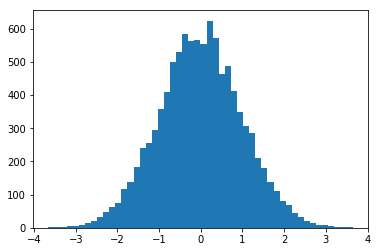

In [7]:
from scipy.stats import norm
X = npr.rand(10000)
Y = norm.ppf(X)
plt.hist(Y, bins=50)

Here are some other types of samples provided by `npr`.

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3) # Many observations of 3 columns
rn2 = npr.randint(0, 10, sample_size) # Includes 0, not 10. With replacement (obviously)
rn3 = npr.sample(size=sample_size) # Random floats in [0.0,1.0)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size, replace=True) # Sample from a given array

Here is a nice depiction of all of these together:

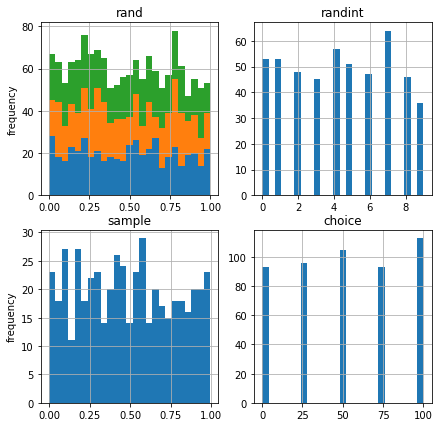

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(7,7))

ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2,bins=25)
ax2.set_title('randint')
ax2.grid(True)
ax3.hist(rn3,bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4,bins=25)
ax4.set_title('choice')
ax4.grid(True)

It is nice to know the *quantile function* trick above because it illustrates the relationship between CDF and sampling, but we need not do that most of the time because we have plenty of distributions implemented already in `numpy`.

Let's look at some of these starting with the *standard normal* or *Gaussian*. From the text:
>Although	there	is	much	criticism	around	the	use	of	(standard)	normal	distributions	in finance,	they	are	an	indispensible	tool	and	still	the	most	widely	used	type	of	distribution,
in	analytical	as	well	as	numerical	applications.	One	reason	is	that	many	financial	models
directly	rest	in	one	way	or	another	on	a	normal	distribution	or	a	log-normal	distribution.

In [10]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

Another nifty four-pane plot of these samples:

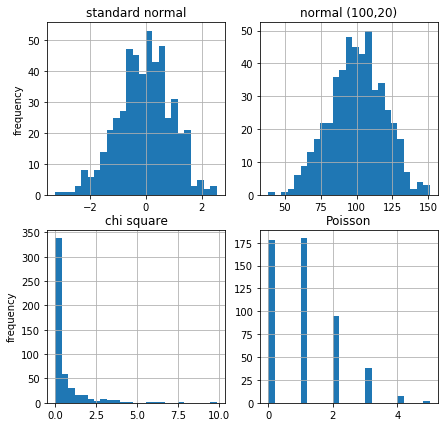

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(7,7))

ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2,bins=25)
ax2.set_title('normal (100,20)')
ax2.grid(True)
ax3.hist(rn3,bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4,bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

**Simulation**

What we just saw was the mathematical engine inside the stochastic financial models we really care about. *Monte Carlo* simulation is the modeling technique we'll discuss now.

Again quoting your text:
>Monte	Carlo	simulation	(MCS)	is	among	the	most	important	numerical	techniques	in
finance,	if	not	the	most	important	and	widely	used.

But where does this odd name come from?

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/Le_casino_de_Monte-Carlo.JPG" style="width: 600px;"/>


Let's look at the *Black-Scholes-Merton* equation

$$ S_T = S_0\exp((r-\frac{1}{2}\sigma^2)T + \sigma\sqrt{T}z)$$

where

* $S_T$ is the index level at time $T$.
* $r$ is the constant riskless short rate.
* $\sigma$ is the constant volatility (= standard deviation of returns) of $S$.
* $z$ is a *standard normally distributed* random variable.

Let's set up the simulation.

In [12]:
S0 = 100 # Initial value
r = 0.05 # Constant Short Rate
sigma = 0.25 # Volatility
T = 2.0 # in years
I = 10000 # number of random draws
z = npr.standard_normal(I)
ST1 = S0*np.exp((r-.5*sigma**2)*T + sigma*np.sqrt(T)*z)

Here we visualize this:

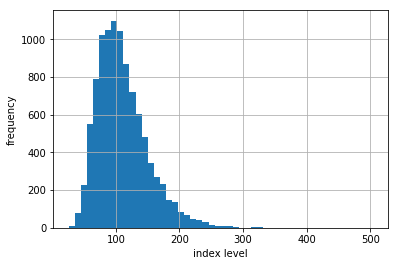

In [13]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

This should evoke feelings of *log-normality*, i.e. the log of this random variable is normally distributed. Therefore, we can also sample direction from the lognormal:

In [14]:
ST2 = S0 * npr.lognormal((r-.5*sigma**2)*T, sigma * np.sqrt(T), size=I)

Let's have a look:

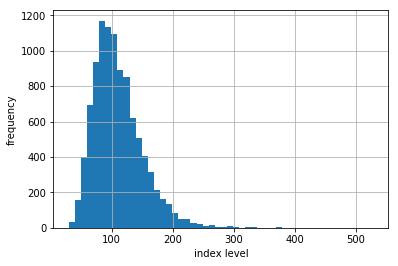

In [15]:
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

And now let's compare numerically...

In [16]:
import scipy.stats as scs

def print_statistics(a1,a2):
    sta1=scs.describe(a1)
    sta2=scs.describe(a2)
    print("%14s %14s %14s" % ('statistic','data set 1', 'data set 2') )
    print(45*"")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

Trying it out:

In [17]:
print_statistics(ST1,ST2)

     statistic     data set 1     data set 2

          size      10000.000      10000.000
           min         25.658         29.698
           max        504.005        528.590
          mean        110.034        110.543
           std         39.724         40.118
          skew          1.110          1.179
      kurtosis          2.524          3.164


Pretty close!

**Stochastic Processes**

Let's talk about the *processes* that generate these data. Technically speaking, a *Stochastic process* is a sequence of random variables.

In finance, stochastic processes generally exhibit the *Markov property*:

>that	tomorrow’s	value	of	the	process	only	depends	on	today’s	state	of
the	process,	and	not	any	other	more	“historic”	state	or	even	the	whole	path	history.	The
process	then	is	also	called	memoryless.

**Geometric Brownian Motion**

Consider the BSM model in its differential form:

$$ S_t = S_{t-\Delta t} \exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_t) $$

We translate into Python:

In [18]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M+1,I))
S[0] = S0
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r - .5*sigma**2)*dt
                         + sigma * np.sqrt(dt) * npr.standard_normal(I))

Once again our data have a lognormal distribution:

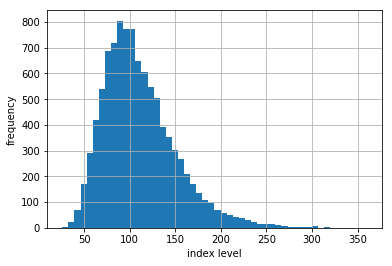

In [19]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

Again, we can compare the summary statistics.

In [20]:
print_statistics(S[-1],ST2)

     statistic     data set 1     data set 2

          size      10000.000      10000.000
           min         26.127         29.698
           max        359.987        528.590
          mean        110.859        110.543
           std         40.089         40.118
          skew          1.113          1.179
      kurtosis          2.057          3.164


Then we can visualize the first 10 *simulated paths* (stop and think about what that really means).

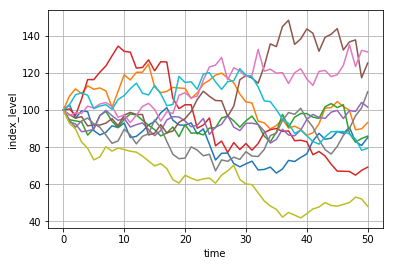

In [21]:
plt.plot(S[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index_level')
plt.grid(True)

That's enough of that for now. We'll pick with the *square-root diffusion* model next time (an example of a mean-reverting process).

**Statistics**

**Normality Tests**

Important financial models rest on the assumption that returns of securities are normally distributed - but this assumption is not always valid.

Let's discuss approaches to test a given time series for normality of returns


**Benchmark Case**

We will take another look at *paths* just like the ones we saw above. Let's encapsulate it in a function.

In [22]:
import matplotlib as mpl
import statsmodels.api as sm

In [23]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float      initial stock/index value
    r : float       constant short rate
    sigma : float   constant volatility
    T : float       final time horizon
    M : int         number of time steps/intervals
    I : int         number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

Here are the parameters for a Monte Carlo simulation, generating via the function `gen_paths` $250,000$ paths with $50$ time steps each:


In [24]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
paths = gen_paths(S0, r, sigma, T, M, I)

Let's plot again; $10$ simulated paths (out of hundreds of thousands) of geometric Brownian motion.

Text(0, 0.5, 'index level')

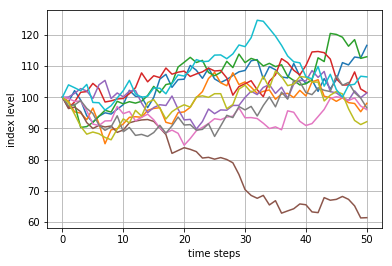

In [25]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

Now we generate an `ndarray` object with all log returns.


In [26]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

And here is the first path over all 50 time steps.

In [27]:
paths[:, 0].round(4)

array([100.    ,  98.5377, 102.1373,  99.0873,  94.067 ,  91.9849,
        93.9068,  95.0215,  94.6091,  96.1838,  97.6349, 102.237 ,
       100.313 , 100.1774,  96.665 ,  99.9355, 105.8294, 107.343 ,
       103.1832, 105.6556, 105.7956, 110.1965, 108.6645, 106.082 ,
       109.339 , 105.879 , 104.744 , 105.6984, 106.9673, 108.1575,
       108.6096, 111.6892, 112.0864, 105.8915, 109.8368, 108.8159,
       106.5145, 106.2051, 110.8507, 106.7946, 104.4197, 105.5742,
       101.8949, 105.9872, 102.6803, 105.6199, 111.1095, 110.3768,
       112.9087, 112.6291, 116.6391])

And the log-return series for a simulated path

In [28]:
log_returns[:, 0].round(4)

array([-0.0147,  0.0359, -0.0303, -0.052 , -0.0224,  0.0207,  0.0118,
       -0.0043,  0.0165,  0.015 ,  0.0461, -0.019 , -0.0014, -0.0357,
        0.0333,  0.0573,  0.0142, -0.0395,  0.0237,  0.0013,  0.0408,
       -0.014 , -0.0241,  0.0302, -0.0322, -0.0108,  0.0091,  0.0119,
        0.0111,  0.0042,  0.028 ,  0.0035, -0.0569,  0.0366, -0.0093,
       -0.0214, -0.0029,  0.0428, -0.0373, -0.0225,  0.011 , -0.0355,
        0.0394, -0.0317,  0.0282,  0.0507, -0.0066,  0.0227, -0.0025,
        0.035 ])

Here is a different function for printing statistics

In [29]:
def printStatistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

Now we flatten the 2D array and print a summary of all of the log-return data.

In [30]:
printStatistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.14225
           max         0.14847
          mean         0.00060
           std         0.02828
          skew         0.00022
      kurtosis        -0.00223


One way to test normality is by visual inspection...

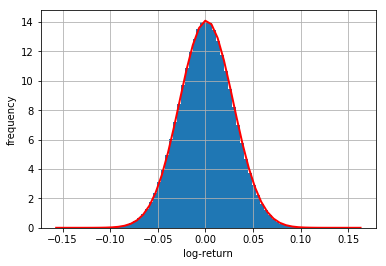

In [31]:
plt.hist(log_returns.flatten(), bins=70, density=True)
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0) 

Another way to graphically 'test' for normality is to create quantile-quantile plot. Here, sample quantile values are compared to theoretical quantile values.


Text(0, 0.5, 'sample quantiles')

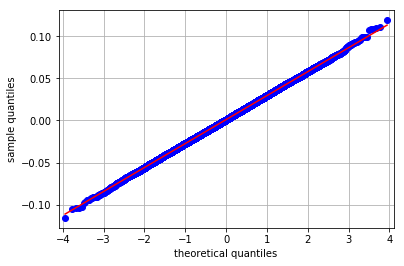

In [32]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Here is a (slightly) more rigorous analysis of normality.

In [33]:
def normality_tests(array):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print ("Skew of data set  %14.3f" % scs.skew(array))
    print ("Skew test p-value %14.3f" % scs.skewtest(array)[1])
    print ("Kurt of data set  %14.3f" % scs.kurtosis(array))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(array)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(array)[1])

In [34]:
normality_tests(log_returns.flatten())

Skew of data set           0.000
Skew test p-value          0.752
Kurt of data set          -0.002
Kurt test p-value          0.107
Norm test p-value          0.259


Generally, a *p-value* is the probability of *falsely rejecting the null hypothesis given that the null hypothesis is true*. So we want these p-values to be high. Two of them look pretty high, though it'd be nice if that last guy were higher.

That was a look at all of the log-return values. Now we will check whether the end-of-period values are log-normal:

Text(0.5, 1.0, 'log data')

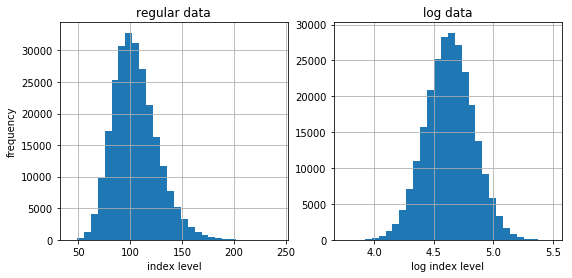

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

Looks pretty normal, if you ask me.

The statistics for the data set show expected behavior — for example, a mean value close to $105$ and a standard deviation (volatility) close to $20\%$:

In [36]:
printStatistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.36338
           max       242.14912
          mean       105.11920
           std        21.19157
          skew         0.60756
      kurtosis         0.63678


The mean and volatility are close to what we'd expect based on the parameters $r=.05$ and $\sigma = .2$

The log index level values also have skew and kurtosis values close to zero:

In [37]:
printStatistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.74628
           max         5.48955
          mean         4.63517
           std         0.19963
          skew        -0.00025
      kurtosis        -0.01385


This data set also shows high p-values, providing strong support for the normal distribution hypothesis


In [38]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.000
Skew test p-value          0.960
Kurt of data set          -0.014
Kurt test p-value          0.157
Norm test p-value          0.367


Again, visual inspection of the match between our distribution and a normal directly sampled.

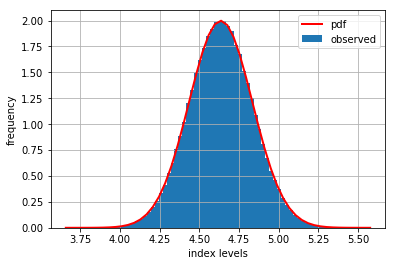

In [39]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()

And, again, the quantile-quantile plot:

Text(0, 0.5, 'sample quantiles')

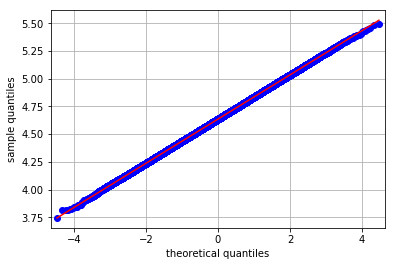

In [40]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

**Real World Data**

In [41]:
import pandas as pd
from iexfinance import get_historical_data
from datetime import datetime

We are going to analyze four historical time series: two tracking ETFs (the SPY and DIA) and two stocks (Apple and Google).


In [42]:
symbols = ['SPY', 'DIA', 'AAPL', 'GOOG']

# Let's start four years ago
start = datetime(2014, 11, 6)

# Here is our query.
data = get_historical_data(symbols=symbols, start=start,  output_format='pandas')


We must convert this to a dataframe - the 'output_format' parameter is not enough because of what `data` actually is:

In [43]:
data['SPY']

,open,high,low,close,volume
date,,,,,
2014-11-06,186.9475,187.7511,186.2547,187.6495,107089076
2014-11-07,187.6865,188.0651,187.1507,187.8250,89539712
2014-11-10,187.8712,188.4716,187.6310,188.4162,66318964
2014-11-11,188.4855,188.7210,188.1114,188.5963,54499375
2014-11-12,187.8343,188.6564,187.7973,188.3977,90120295
2014-11-13,188.5640,189.2013,187.7049,188.6102,85357918
2014-11-14,188.5455,188.8873,188.1760,188.6564,80417514
2014-11-17,188.2961,188.9704,188.1114,188.7764,80440954
2014-11-18,188.8411,190.2082,188.8411,189.8664,76068107


In [44]:
frame = pd.DataFrame({c:data[c]['close'] for c in symbols}, columns=symbols)

And let's have a look at it..

In [45]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 2014-11-06 to 2018-11-30
Data columns (total 4 columns):
SPY     1025 non-null float64
DIA     1025 non-null float64
AAPL    1025 non-null float64
GOOG    1025 non-null float64
dtypes: float64(4)
memory usage: 40.0+ KB


And what is in it?

In [46]:
frame.head()

,SPY,DIA,AAPL,GOOG
date,,,,
2014-11-06,187.6495,159.7024,101.3759,542.04
2014-11-07,187.8250,159.9667,101.6650,541.01
2014-11-10,188.4162,160.3038,101.4972,547.49
2014-11-11,188.5963,160.3675,102.3085,550.29
2014-11-12,188.3977,160.3858,103.7541,547.31


We can get the four time series normalized to a starting value of 100:

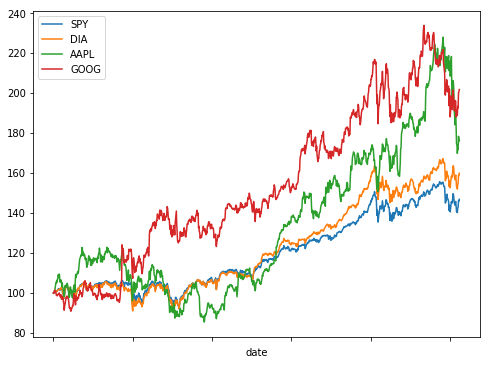

In [47]:
(frame / frame.iloc[0] * 100).plot(figsize=(8, 6))

Once again, we can calculate the log-returns using the shift method:

In [48]:
log_returns = np.log(frame / frame.shift(1))
log_returns.head()

,SPY,DIA,AAPL,GOOG
date,,,,
2014-11-06,NaN,NaN,NaN,NaN
2014-11-07,0.000935,0.001654,0.002848,-0.001902
2014-11-10,0.003143,0.002105,-0.001652,0.011906
2014-11-11,0.000955,0.000397,0.007962,0.005101
2014-11-12,-0.001054,0.000114,0.014031,-0.005430


And we have a look.

We guess that these distributions are not normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0acd383ba8>,
      dtype=object)

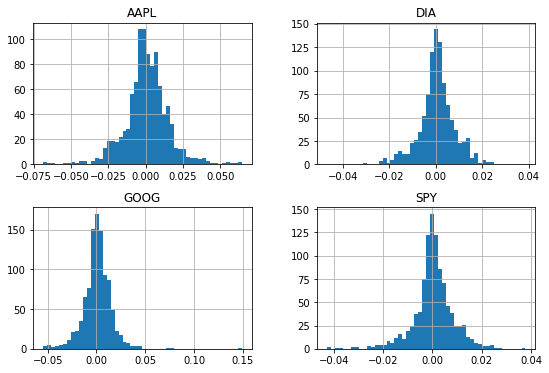

In [49]:
log_returns.hist(bins=50, figsize=(9, 6))

Let's ask our statistical methods...

In [50]:
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    printStatistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1024.00000
           min        -0.04272
           max         0.03767
          mean         0.00038
           std         0.00825
          skew        -0.61704
      kurtosis         3.60561

Results for symbol DIA
------------------------------
     statistic           value
------------------------------
          size      1024.00000
           min        -0.04682
           max         0.03867
          mean         0.00046
           std         0.00831
          skew        -0.60992
      kurtosis         3.55194

Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      1024.00000
           min        -0.06863
           max         0.06419
          mean         0.00055
           std         0.01509
          skew        -0.15607
      kurtosis         2.944

The observation here is that the kurtosis is too far off for normality. Intuitively, you should think of it as *peakedness* - look again at the picture!

We also have the quantile-quantile plot tool at our disposal:

Text(0, 0.5, 'sample quantiles')

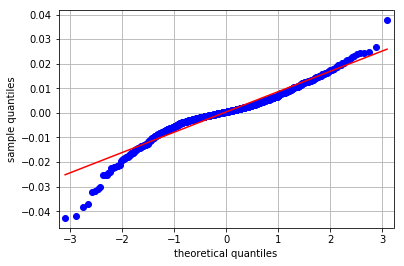

In [51]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

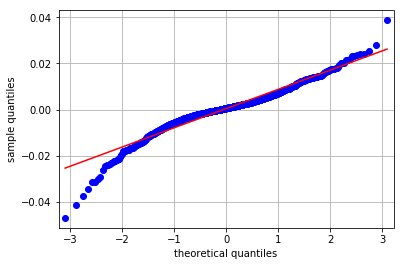

In [52]:
sm.qqplot(log_returns['DIA'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

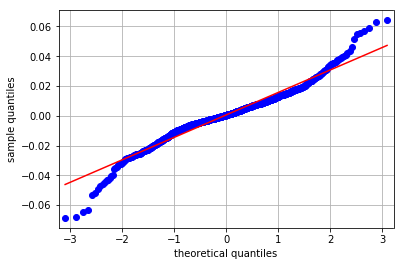

In [53]:
sm.qqplot(log_returns['AAPL'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

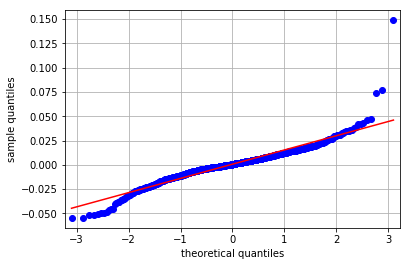

In [54]:
sm.qqplot(log_returns['GOOG'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

The sample quantile values do not lie on a straight line, indicating non-normality. The time series data exhibits fat tails.

At long last, we go ahead and do the formal normality tests:

In [55]:
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set          -0.617
Skew test p-value          0.000
Kurt of data set           3.606
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DIA
--------------------------------
Skew of data set          -0.610
Skew test p-value          0.000
Kurt of data set           3.552
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL
--------------------------------
Skew of data set          -0.156
Skew test p-value          0.041
Kurt of data set           2.945
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GOOG
--------------------------------
Skew of data set           0.859
Skew test p-value          0.000
Kurt of data set          12.272
Kurt test p-value          0.000
Norm test p-value          0.000


The tiny p-values (effectively zero), means that there is no chance of falsely rejecting the hypothesis of normality. Therefore we reject it.

**Portfolio Optimization**

The following example is based on MPT - *mean-variance portfolio theory*. The basic idea of MPT is diversification to achieve a minimal portfolio risk or maximal portfolio returns given a certain level of risk.

Let's start with another set of stocks:

In [56]:
# New stocks
symbols = ['AAPL', 'GOOG', 'MSFT', 'DB', 'GLD']

noa = len(symbols)

# Let's start four years ago
start = datetime(2014, 11, 6)

# Here is our query.
data = get_historical_data(symbols=symbols, start=start,  output_format='pandas')

# Getting just the close values.
frame = pd.DataFrame({c:data[c]['close'] for c in symbols}, columns=symbols)

In [57]:
frame.head()

,AAPL,GOOG,MSFT,DB,GLD
date,,,,,
2014-11-06,101.3759,542.04,44.0892,29.2518,109.88
2014-11-07,101.6650,541.01,44.0711,28.8888,112.97
2014-11-10,101.4972,547.49,44.2612,28.6595,110.46
2014-11-11,102.3085,550.29,44.2431,28.8028,112.04
2014-11-12,103.7541,547.31,44.1616,28.2774,111.50


Again, taking a normalized look at it:

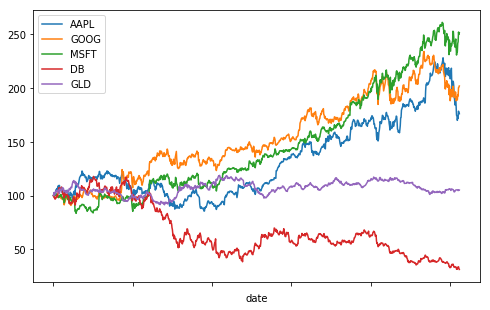

In [58]:
(frame / frame.iloc[0] * 100).plot(figsize=(8, 5))

The *mean-variance* in the name for this approach refers to the mean variance of the log-returns of the various securities, calculated thus:

In [59]:
rets = np.log(frame / frame.shift(1))

We use a factor of $252$ trading days to annualize the daily returns

In [60]:
rets.mean() * 252

AAPL    0.139339
GOOG    0.172918
MSFT    0.226978
DB     -0.285738
GLD     0.012361
dtype: float64

We can also get the *covariance matrix*, which says something about how the different stocks vary together.

In [61]:
rets.cov() * 252

,AAPL,GOOG,MSFT,DB,GLD
AAPL,0.057387,0.027604,0.030334,0.024170,-0.002968
GOOG,0.027604,0.054157,0.035886,0.024990,-0.002334
MSFT,0.030334,0.035886,0.054690,0.027467,-0.003153
DB,0.024170,0.024990,0.027467,0.144649,-0.009080
GLD,-0.002968,-0.002334,-0.003153,-0.009080,0.017732


**Basic Theory**

In [62]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.0353452 , 0.13082727, 0.34659483, 0.4704835 , 0.01674919])

##### General formula for expected portfolio return

$\Large \mu_p = E(\displaystyle\sum_I w_ir_i) = \sum_I w_i E(r_i) = \sum_I w_i \mu_i = w^T \mu$

$I$ is the number of assets 

$w_i$  is the weight of asset $i$ ($w_i ≥ 0$, $\sum_I w_i = 1$)

$r_i$ are the state-dependent future returns

$\mu_i$ is the expected return for security $i$

$w_T$ is the transpose of the weights vector 

$\mu$  is the vector of the expected security returns


Note that this is another *linear model*. We saw some of those before. Note that there is nothing really profound here; we're just weighting the different returns.

The expected portfolio return, we multiply again by $252$ to get annualized return values

In [63]:
np.sum(rets.mean() * weights) * 252

-0.028011345391164753

It gets a little more interesting when we consider the volatility of our portfolio. For that we'll need the covariance matrix.

##### Portfolio covariance matrix

$\Large \sigma_{ij} = \sigma_{ji} = E((r_i - \mu_i)(r_j - \mu_j))$

##### variance of a security is a special case of the covariance

$\Large \sigma_{i}^2 =  E((r_i - \mu_i)^2)$

##### General formula for expected portfolio variance

$\Large \sigma_{p}^2 =  E((r - \mu)^2)  = \displaystyle\sum_{i \in I}\sum_{j \in I} w_i w_j \sigma_{ij} = w^T \sum w$

The dot function gives the dot product of two vectors/matrices. The T or transpose method gives the transpose of a vector or matrix. We can use these to calculate the covariance and the standard deviation.


In [64]:
(np.dot(weights.T, np.dot(rets.cov() * 252, weights)),
 np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

(0.05648972868726497, 0.23767567962933223)

Let's implement a Monte Carlo simulation to generate random portfolio weight vectors on a larger scale. For every simulated allocation, we record the resulting expected portfolio return and variance.


In [65]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

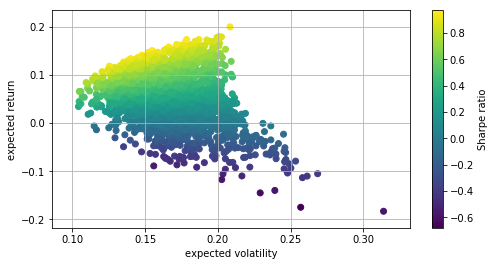

In [66]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

An investor  is generally interested in the maximum return given a fixed risk level or the minimum risk given a fixed return expectation. This set of portfolios then makes up the so-called efficient frontier.

Check out the definition of the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio). We want it to be high.

**Optimization**

So far we just saw description and simulation - how do we figure out an optimal portfolio weighting, given some set of securities?

In [67]:
import scipy.optimize as sco # Time to optimize again.

Note that the code in the function below refers to the returns floating around in the main namespace - *you will have to do something slightly different in the lab*.

In [68]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

The derivation of the optimal portfolios is a constrained optimization problem for which we use the function minimize from the `scipy.optimize` sublibrary.

Let us start with the maximization of the Sharpe ratio. Formally, we minimize the negative value of the Sharpe ratio.

In [69]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

Recall how we provide constraints.

In [70]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))

Now we do the optimization.

In [71]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

Let's look at the results. We access the results object by providing the key of interest 
 — i.e., x in our case.


In [72]:
opts['x'].round(3)

array([0.039, 0.122, 0.596, 0.   , 0.243])

The expected return, volatility and sharpe ratio.

In [73]:
statistics(opts['x']).round(3)

array([0.165, 0.165, 1.   ])

Now let's minimize the variance of the portfolio. Our function describing it.

In [74]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

The actual optimization.

In [75]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [76]:
optv['x'].round(3)

array([0.105, 0.087, 0.077, 0.066, 0.664])

In [77]:
statistics(optv['x']).round(3)

array([0.036, 0.102, 0.357])

**Efficient Frontier**

Now we look at how to calculate the efficient frontier. Remember this means we maximize return subject to a given risk or we minimize risky subject to an expected return.

In [78]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [79]:
def min_func_port(weights):
    return statistics(weights)[1]

Quoting from the text:
>The	approach	we	take	is	that	we	fix	a	target	return	level	and
derive	for	each	such	level	those	portfolio	weights	that	lead	to	the	minimum	volatility
value.

In [80]:
trets = np.linspace(0.0, 0.21, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Let's visualize the results:
>Crosses	indicate	the	optimal	portfolios	given
a	certain	target	return;	the	dots	are,	as	before,	the	random	portfolios.	In	addition,	the	figure
shows	two	larger	stars:	one	for	the	minimum	volatility/variance	portfolio	(the	leftmost
portfolio)	and	one	for	the	portfolio	with	the	maximum	Sharpe	ratio:

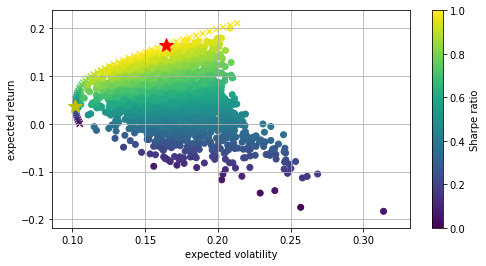

In [81]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')#random portfolio composition
plt.scatter(tvols,trets,c=trets/tvols,marker='x')#efficient frontier
#portfolio with highest Sharpe ratio
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],'r*',markersize=15.0)
#minimum variance portfolio
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*',markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

**Capital Market Line**

Let's finish off with the *Capital Market Line*.

In [82]:
import scipy.interpolate as sci

In [83]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

Interpoloating...

In [84]:
tck = sci.splrep(evols, erets)

Defining a function describing the frontier and also getting its derivative.

In [85]:
def f(x):
    return sci.splev(x, tck, der=0)
def df(x):
    return sci.splev(x, tck, der=1)

##### What we are looking for is a function t(x) = a + b · x describing the line that passes
##### through the riskless asset in risk-return space and that is tangent to the efficient frontier.

##### Mathematical conditions for capital market line

$\Large t(x) = a + b \cdot x$

$\Large t(0) = r_f   \Leftrightarrow     a = r_f$

$\Large t(x) = f(x)   \Leftrightarrow   a + b \cdot x = f(x)$ 

$\Large t'(x) = f'(x)  \Leftrightarrow   b = f'(x)$

In [86]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

Solving....

In [87]:
opt = sco.fsolve(equations, [0.01, 0.1, 0.1])
opt

array([0.01      , 0.9424077 , 0.18259317])

Checking the equations.

In [88]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

In [89]:
pvols

array([0.14910487, 0.17218751, 0.1535889 , ..., 0.19915229, 0.15715892,
       0.15591297])

In [90]:
prets

array([0.06709969, 0.14972279, 0.05324755, ..., 0.13805565, 0.05421569,
       0.13171893])

Having a look at it.

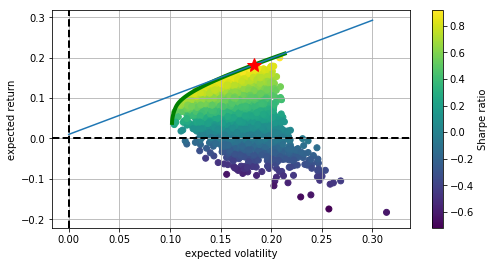

In [91]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

Beautiful and perfect! Finally, we are interested in the portfolio weights that actually did it for us. What are they?

In [92]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [93]:
res['x'].round(3)

array([0.024, 0.125, 0.683, 0.   , 0.168])